In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [4]:
df = df.drop(['Name','Fare'],axis=1)
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
882,0,2,male,27.0,0,0
883,1,1,female,19.0,0,0
884,0,3,female,7.0,1,2
885,1,1,male,26.0,0,0


In [5]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
882,0,2,1,27.0,0,0
883,1,1,0,19.0,0,0
884,0,3,0,7.0,1,2
885,1,1,1,26.0,0,0


In [6]:
scaler = StandardScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,1,-0.529366,1,0
1,1,1,0,0.604265,1,0
2,1,3,0,-0.245958,0,0
3,1,1,0,0.391709,1,0
4,0,3,1,0.391709,0,0
...,...,...,...,...,...,...
882,0,2,1,-0.175106,0,0
883,1,1,0,-0.741922,0,0
884,0,3,0,-1.592145,1,2
885,1,1,1,-0.245958,0,0


In [7]:
x = df.iloc[:,1:].to_numpy()
y = df.iloc[:,0].to_numpy()
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.2,shuffle=True,random_state=2)

In [8]:
acc = []
for k in range(1,11):
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(x_train,y_train)
  preds = model.predict(x_test)
  acc.append(accuracy_score(y_test,preds))
acc

[0.7359550561797753,
 0.7696629213483146,
 0.7584269662921348,
 0.797752808988764,
 0.8033707865168539,
 0.8202247191011236,
 0.7808988764044944,
 0.8258426966292135,
 0.8146067415730337,
 0.8089887640449438]

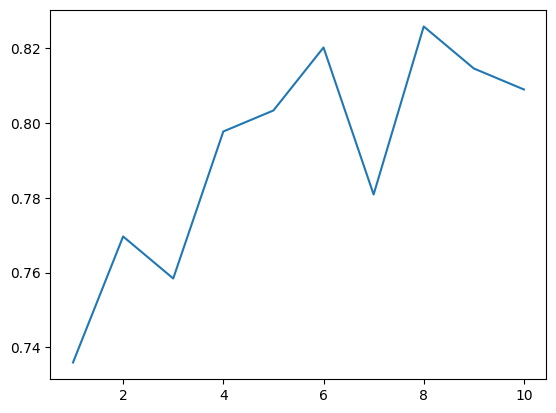

In [9]:
plt.plot([i for i in range(1,11)],acc)

In [10]:
acc = np.array(acc)
np.argmax(acc)

7

In [11]:
model = KNeighborsClassifier(np.argmax(acc)+1)
model.fit(x_train,y_train)
preds = model.predict(x_test)
probs = model.predict_proba(x_test)

In [12]:
cm = confusion_matrix(y_test,preds)
cm

array([[100,   9],
       [ 22,  47]])

In [13]:
prob = probs[:,1]

In [14]:
#use probs[:,1] instead of probs[:,0] coz label of 1 is 1 and if u use probs[:,0] it would give 1-actual value 
fpr , tpr ,_ = roc_curve(y_test,prob)
print("AUC",auc(fpr,tpr))

AUC 0.8585294508708948


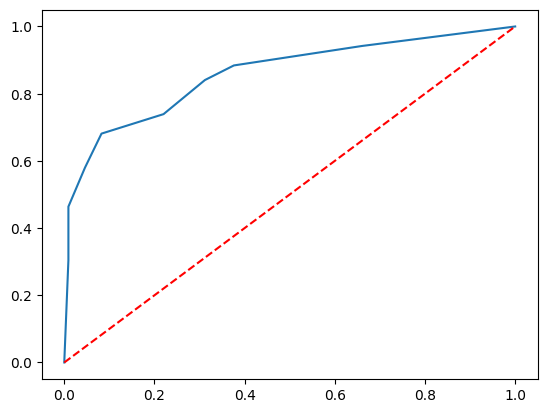

In [15]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')